In [31]:
import os
import pandas as pd

from parser import parse_text_file
from preprocess import clean_text
from similarity import embed_text, calculate_similarity
from resume_pipeline import rank_resumes

In [44]:
# -------------------------------
# Skill Matching Configuration
# -------------------------------

SKILLS = [
    "python", "machine learning", "nlp",
    "deep learning", "sql", "cloud", "aws"
]

def extract_skills(text):
    text = text.lower()
    return [skill for skill in SKILLS if skill in text]

In [47]:
results = []

for filename in os.listdir(resume_folder):
    if filename.endswith(".txt"):
        file_path = os.path.join(resume_folder, filename)

        with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
            resume_text = f.read()

        resume_clean = clean_text(resume_text)
        resume_embedding = embed_text(resume_clean)

        score = calculate_similarity(job_embedding, resume_embedding)

        matched_skills = extract_skills(resume_text)

        results.append((
            filename,
            score,
            ", ".join(matched_skills) if matched_skills else "No matched skills"
        ))

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [48]:
df = pd.DataFrame(
    results,
    columns=["Resume", "Similarity_Score", "Matched_Skills"]
)

df = df.sort_values(by="Similarity_Score", ascending=False)
df

,Resume,Similarity_Score,Matched_Skills
0,corporate-pdf-resume-template-dark-blue.txt,0.241884,No matched skills
1,milano-pdf-resume-template-green.txt,0.235081,No matched skills


In [49]:
df.to_csv("AI_Resume_Screening.csv", index=False)
print("✅ AI_Resume_Screening.csv generated successfully")

✅ AI_Resume_Screening.csv generated successfully


<Axes: title={'center': 'Top 5 Resume Matches'}, xlabel='Resume'>

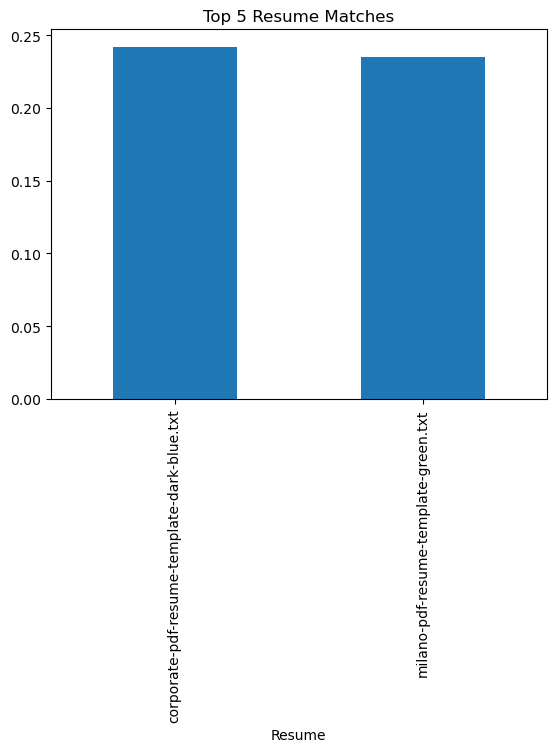

In [50]:
df.head(5).plot(
    x="Resume",
    y="Similarity_Score",
    kind="bar",
    legend=False,
    title="Top 5 Resume Matches"
)

In [51]:
import logging

logging.basicConfig(
    level=logging.INFO,
    format="%(levelname)s: %(message)s"
)

In [52]:
logging.info("Job description loaded successfully")

INFO:root:Job description loaded successfully


In [53]:
logging.info("Started resume screening")

INFO:root:Started resume screening


In [54]:
logging.info(f"Processed resume: {filename}")

INFO:root:Processed resume: milano-pdf-resume-template-green.txt


In [55]:
logging.info("AI_Resume_Screening.csv generated successfully")

INFO:root:AI_Resume_Screening.csv generated successfully


In [56]:
import logging

logging.basicConfig(
    level=logging.INFO,
    format="%(levelname)s: %(message)s"
)

logging.info("Job loaded successfully")

INFO:root:Job loaded successfully
